# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 2. Методы нахождения оценок
### Дедлайн --- 26 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [ ]:
!pip install -q gdown --user
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
To: /home/tanya/Notebooks/stat/Cauchy.csv
100%|██████████████████████████████████████| 18.7k/18.7k [00:00<00:00, 29.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: /home/tanya/Notebooks/stat/Weibull.csv
100%|██████████████████████████████████████| 17.9k/17.9k [00:00<00:00, 10.5MB/s]


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на от\-резке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле Cauchy.csv находятся координаты точек
пересечения лучей с поверхностью Земли.

In [ ]:
sample_1 = pd.read_csv("Cauchy.csv")["sample"].values

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор
точек с некоторым шагом и верните ту, на которой достигается
максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


#### Решение:
$$arg\max_{x_0}f_{x_0}(X) = arg\max_{x_0}\ln f_{x_0}(X) = arg\max_{x_0}L_{x_0}(X)$$
$$L_{x_0}(X) = \ln \prod_{i=1}^n\frac{1}{\pi(1+(x_i - x_0)^2)} = -n\ln\pi - \sum_{i=1}^n\ln(1+(x_i-x_0)^2) $$

In [ ]:
# логарифм функции правдоподобия (X -выборка из распредлениея Коши, x0 - параметр распределения)
def L(X, x0):
    return -len(X)*np.log(np.pi) - np.sum(np.log(1 + (X - x0)**2))

x = np.linspace(-1000, 1000, 200000)
sizes_sample = [10, 100, len(sample_1)]
answer = []
for size in sizes_sample:
    L_x = np.array([L(sample_1[:size], x0) for x0 in x])
    param = x[np.argmax(L_x)]
    answer.append(param)
    
true_answer = []
for size in sizes_sample:
    true_answer.append(sps.cauchy.fit(sample_1[:size])[0])

Сравните полученные результаты с `sps.cauchy.fit`

In [ ]:
data = {
    'Размер выборки': sizes_sample,
    'Найденая оценка': answer,
    'Истиная оценка': true_answer
}
df = pd.DataFrame(data)
df

,Размер выборки,Найденая оценка,Истиная оценка
0,10,208.526043,208.505770
1,100,207.896039,207.878825
2,1000,207.976040,207.977728


#### Вывод:
Результаты найденой оценки незначительно отличаются от истиной оценки для всех рассмотренных выборок. Значит для нахождения оценки параметра можно ограничиться выборкой небольшого размера. 

## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по
сравнению с началом дня (6 часов утра). В полночь работники банка
измеряют две величины: $X^1$ – максимальное значение баланса за
день, $X^2$ – значение баланса в полночь. Считается, что величина
$X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В течение 10 лет каждый день банк проводил
измерение величины $X,$ получив в результате выборку $X_1, \ldots,
X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [ ]:
sample_2 = np.loadtxt("Weibull.csv")

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$
Подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. Постройте график (`plt.scatter`) выделив данные за первые четыре года красным цветом (`sample_2[:1461]`), остальные синим (`sample_2[1461:]`). Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла. 


In [ ]:
# Заменим нули в нашей выборки на достаточно малое число
sample_2 = [(lambda y : y if y!= 0 else 1e-5)(x) for x in sample_2]

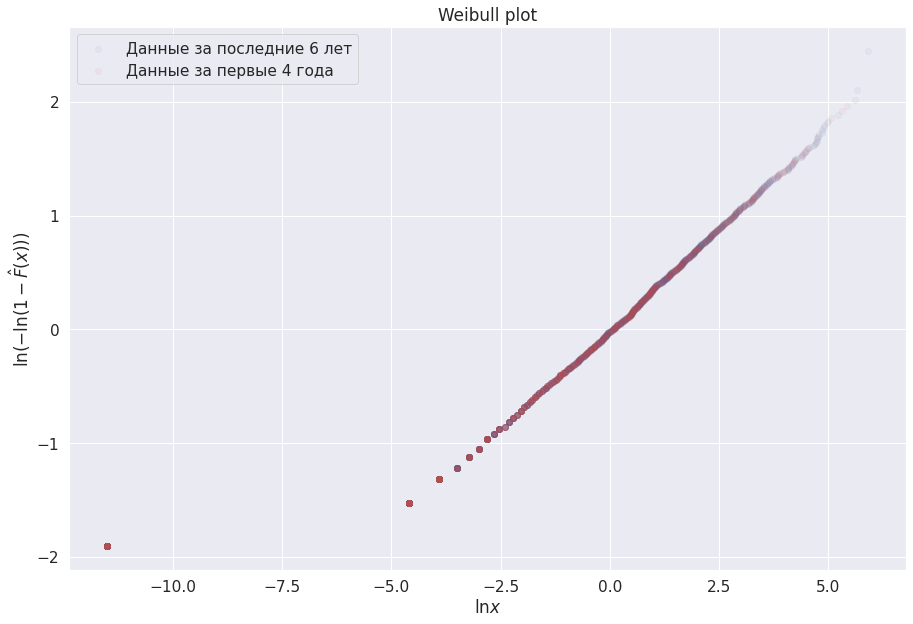

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

esdf = ECDF(sample_2)
esdf_sample = esdf(sample_2)
# уберем единичные значения
esdf_sample = np.array([(lambda y: y if y != 1 else 1 - 1e-5)(x) for x in esdf_sample])

x = np.log(sample_2)
y = np.log(-np.log(1 - esdf_sample))

plt.figure(figsize=(15, 10))
plt.title('Weibull plot')
plt.scatter(
    x[1461:], 
    y[1461:], 
    alpha=0.05, color = 'b', label='Данные за последние 6 лет'
)
plt.scatter(
    x[:1461], 
    y[:1461],
    alpha=0.05, color = 'r', label='Данные за первые 4 года'
)

plt.xlabel('$\ln x$')
plt.ylabel('$\ln (-\ln (1-\hat F(x)))$')
plt.legend()
plt.show()

Сделайте вывод.

**Вывод**
Мы видим на графике прямую, а значит выборка действительно имеет распределение Вейбулла. Кроме того, чтобы понять, что это распределение Вейбула, достаточно рассмотреть выборку первых 4 лет.

Оцените параметр формы методом максимального правдоподобия 
* по
первым 4 годам; 
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

#### Решение:
$$
p(x) = \gamma x^{\gamma - 1}e^{-x^{\gamma}}
$$

$$
L_{\gamma}(X) = \prod_{i=1}^n\gamma x_i^{\gamma - 1}e^{-x^{\gamma}} = n\ln \gamma + (\gamma - 1)\sum_{i=1}^n\ln x_i - \sum_{i=1}^nx_i^{\gamma}
$$

**Оценка по первым 4 годам:**

In [ ]:
# Логарифмичесая функция максимального правдоподобия
def L(X, y):
    return len(X) * np.log(y) + (y - 1) * np.sum(np.log(X)) - np.sum(X ** y)

x = np.linspace(-2, 2, 4000)

# значения логарифмической функции правдоподобия на выборке первых 4 лет
L_x = np.array([L(sample_2[:1461], 10 ** x0) for x0 in x])
param = x[np.argmax(L_x)]
gamma_first_four_years = 10 ** param

print('Gamma = {}'.format(gamma_first_four_years))

Gamma = 0.3276263660093939


**Оценка по всей выборке:**

In [ ]:
# значения логарифмической функции правдоподобия на все выборке
L_x = np.array([L(sample_2, 10 ** x0) for x0 in x])
param = x[np.argmax(L_x)]
gamma_all_years = 10 ** param

print('Gamma = {}'.format(gamma_all_years))

Gamma = 0.32238668330109005


Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

In [ ]:
gamma_true = sps.weibull_min.fit(sample_2, fscale=1, floc=0)[0]

print('Gamma true = {}'.format(gamma_true))

Gamma true = 0.32246093749999943


Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$). Хорошо ли линии соответствуют выборке? Как вы думаете, почему?



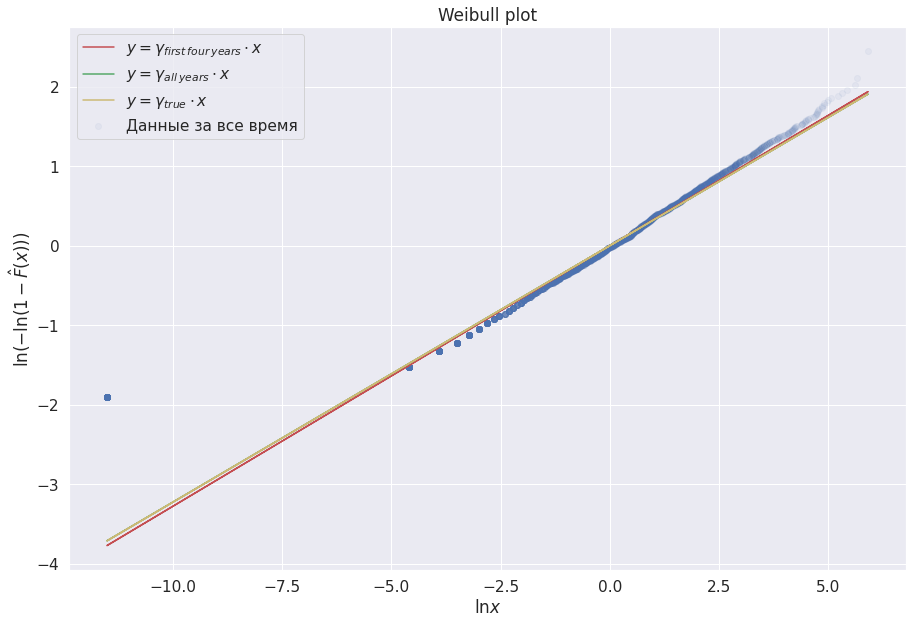

In [ ]:
x = np.log(sample_2)
y = np.log(-np.log(1 - esdf_sample))

plt.figure(figsize=(15, 10))
plt.title('Weibull plot')

plt.scatter(x, y, alpha=0.05, color = 'b', label='Данные за все время')
plt.plot(x, gamma_first_four_years * x, color='r', label="$y =\gamma_{first \: four \: years} \cdot x$")
plt.plot(x, gamma_all_years * x, color='g', label="$y =\gamma_{all \: years} \cdot x$")
plt.plot(x, gamma_true * x, color='y', label="$y =\gamma_{true} \cdot x$")

plt.xlabel('$\ln x$')
plt.ylabel('$\ln (-\ln (1-\hat F(x)))$')
plt.legend()
plt.show()

**Вывод:**

Есть выбросы и незначительные отклонения, но в целом линии хорошо соответствуют выборке, т.к. выборка имеет распределение Вейбулла.
Кроме того, мы еще раз убедились, что для анализа распределения выборки достаточно рассматривать выборку первых 4 лет, т.к. оценка значений параметра формы на выборке за первые 4 года потчи не отличаются от истинной.

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

- ОММ для $N(0, \theta)$ : $\theta^* = \overline {X}^2$
- ОММ для $U(0, \theta)$ : $\theta^* = 2 \overline {X}$
- ОММ для $\Gamma (1, \theta)$ : $\theta^* = \overline {X}$

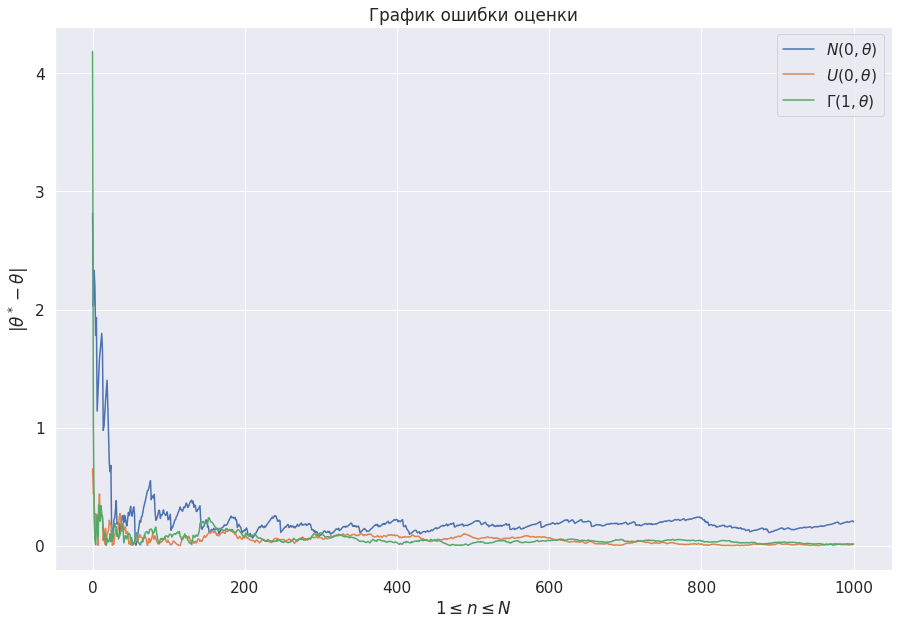

In [ ]:
N = 1000
THETA = 3

sample_norm_rvs = sps.norm(loc=0, scale=THETA ** 0.5).rvs(size=N)
sample_uniform_rvs = sps.uniform(loc=0, scale=THETA).rvs(size=N)
sample_gamma_rvs = sps.gamma(a=THETA, scale=1).rvs(size=N)

def omm_estimate_for_norm_rvs(sample):
    return np.sum(sample ** 2) / len(sample)

def omm_esimate_for_uniform_rvs(sample):
    return 2 * np.sum(sample) / len(sample)

def omm_estimate_for_gamma_rvs(sample):
    return np.sum(sample) / len(sample)

estimates_norm = [omm_estimate_for_norm_rvs(sample_norm_rvs[0:size]) for size in range(1, N + 1)]
estimates_uniform = [omm_esimate_for_uniform_rvs(sample_uniform_rvs[0:size]) for size in range(1, N + 1)]
estimates_gamma = [omm_estimate_for_gamma_rvs(sample_gamma_rvs[0:size]) for size in range(1, N + 1)]


plt.figure(figsize=(15, 10))
plt.title('График ошибки оценки')

diff_estimates_norm = np.abs(np.array(estimates_norm) - THETA)
plt.plot(np.linspace(0, N, N), diff_estimates_norm, label=('$N(0, θ)$'))

diff_estimates_uniform = np.abs(np.array(estimates_uniform) - THETA)
plt.plot(np.linspace(0, N, N), diff_estimates_uniform, label=('$U(0, θ)$'))

diff_estimates_gamma = np.abs(np.array(estimates_gamma) - THETA)
plt.plot(np.linspace(0, N, N), diff_estimates_gamma, label=('$\Gamma(1, θ)$'))
        
plt.xlabel('$1\leq n \leq N$')
plt.ylabel('$|θ^* - θ|$')
plt.legend()
plt.show()

### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, незабудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).


In [ ]:
K = [10] + [50] + list(range(100, 1001, 100))
K

[10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [ ]:
# генерация набора из K бутстрепных выборок
def generate_bootstrap_sample(sample, k):
    return np.array([np.random.choice(sample[0:k], k) for i in range(k)])

# вычисление дисперсии бутстрепных оценок
def calc_var_estimates(estimates):
    return np.sum(estimates ** 2) / len(estimates) - (np.sum(estimates) / len(estimates)) ** 2

# вычисление среднего бутстрепных оценок
def calc_mean_estimates(estimates):
    return np.sum(estimates) / len(estimates)

#### $N(0, \theta)$

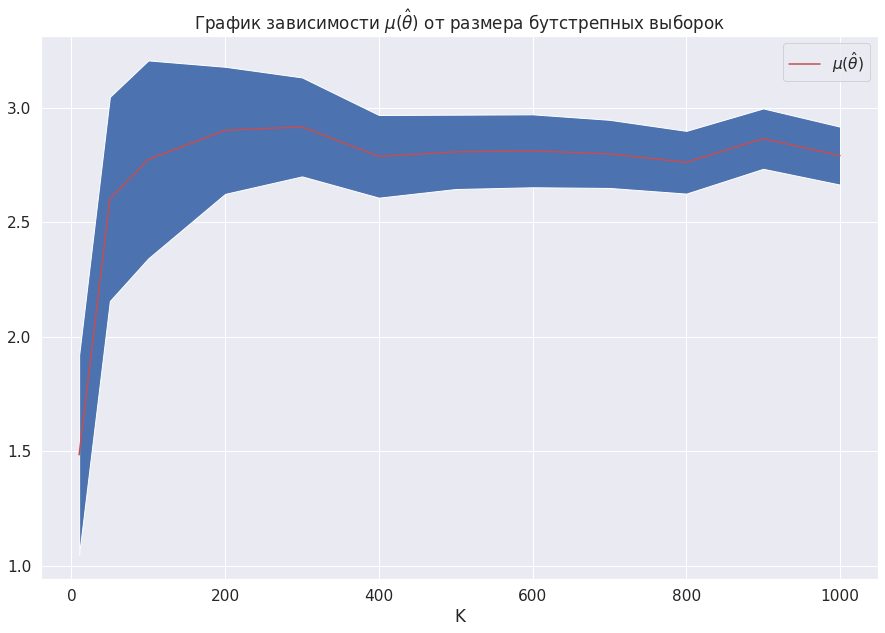

In [ ]:
# средние значения оценкок
mean_values = []
# стандартные отклонения
sigmas = []
for k in K:
    bootstrap_sample = generate_bootstrap_sample(sample_norm_rvs, k)
    bootstrap_estimates = np.array([omm_estimate_for_norm_rvs(bootstrap_sample[i]) for i in range(k)])
    var = calc_var_estimates(bootstrap_estimates)
    mean = calc_mean_estimates(bootstrap_estimates)
    mean_values.append(mean)
    sigmas.append(var ** 0.5)

plt.figure(figsize=(15, 10))
plt.title('График зависимости $\mu (\hat{θ})$ от размера бутстрепных выборок')

plt.plot(K, mean_values, color='r', label=('$\mu (\hat{θ})$'))
plt.fill_between(K, np.subtract(mean_values,sigmas) , np.add(mean_values, sigmas))
        
plt.xlabel('K')

plt.legend()
plt.show()

#### $U(0, \theta)$

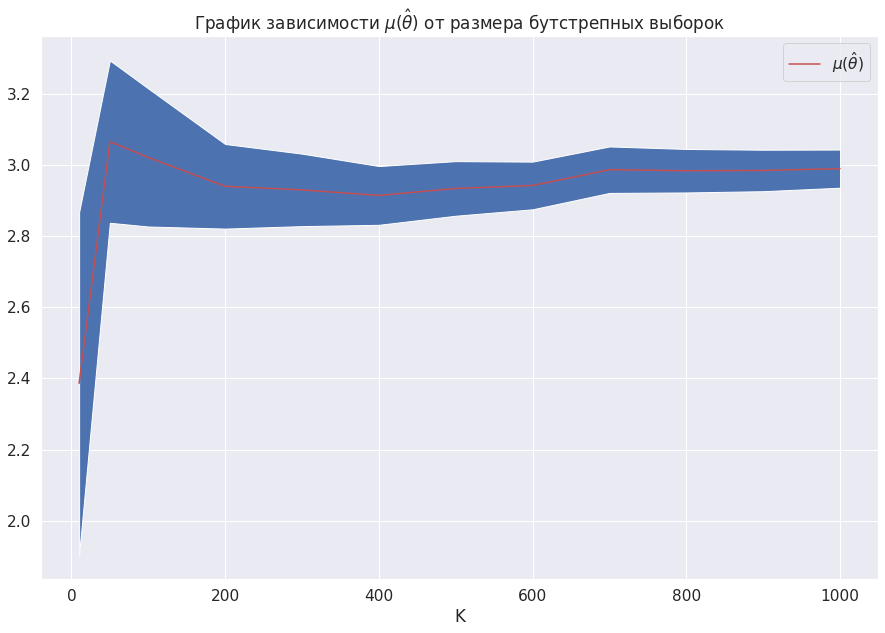

In [ ]:
# средние значения оценкок
mean_values = []
# стандартные отклонения
sigmas = []
for k in K:
    bootstrap_sample = generate_bootstrap_sample(sample_uniform_rvs, k)
    bootstrap_estimates = np.array([omm_esimate_for_uniform_rvs(bootstrap_sample[i]) for i in range(k)])
    var = calc_var_estimates(bootstrap_estimates)
    mean = calc_mean_estimates(bootstrap_estimates)
    mean_values.append(mean)
    sigmas.append(var ** 0.5)

plt.figure(figsize=(15, 10))
plt.title('График зависимости $\mu (\hat{θ})$ от размера бутстрепных выборок')

plt.plot(K, mean_values, color='r', label=('$\mu (\hat{θ})$'))
plt.fill_between(K, np.subtract(mean_values, sigmas) , np.add(mean_values, sigmas))
        
plt.xlabel('K')

plt.legend()
plt.show()

#### $\Gamma(1, \theta)$

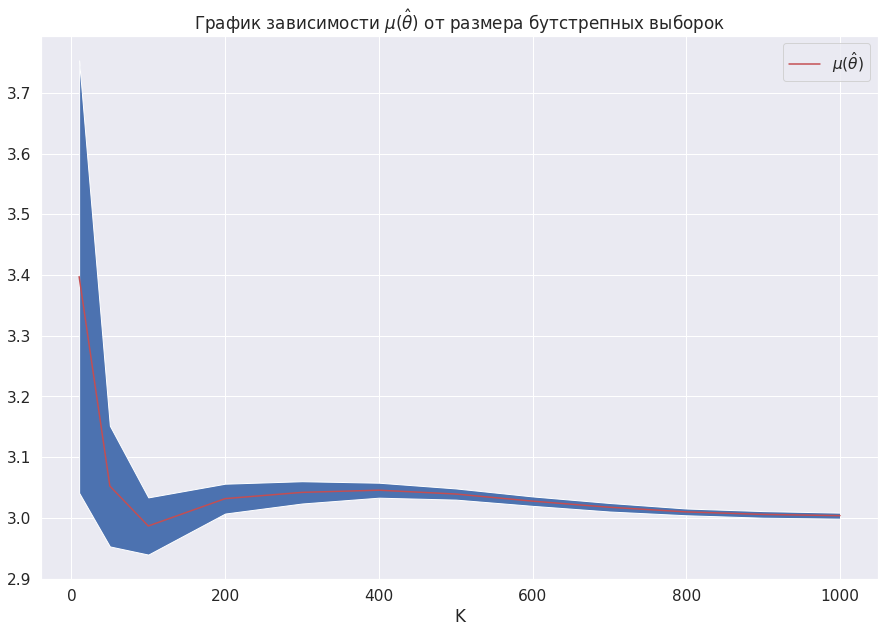

In [ ]:
# средние значения оценкок
mean_values = []
# стандартные отклонения
sigmas = []
for k in K:
    bootstrap_sample = generate_bootstrap_sample(estimates_gamma, k)
    bootstrap_estimates = np.array([omm_estimate_for_gamma_rvs(bootstrap_sample[i]) for i in range(k)])
    var = calc_var_estimates(bootstrap_estimates)
    mean = calc_mean_estimates(bootstrap_estimates)
    mean_values.append(mean)
    sigmas.append(var ** 0.5)

plt.figure(figsize=(15, 10))
plt.title('График зависимости $\mu (\hat{θ})$ от размера бутстрепных выборок')

plt.plot(K, mean_values, color='r', label=('$\mu (\hat{θ})$'))
plt.fill_between(K, np.subtract(mean_values,sigmas) , np.add(mean_values, sigmas))
        
plt.xlabel('K')

plt.legend()
plt.show()

# Новый раздел

**Вывод:**

По графикам видно, что бутстрепная оценка с ростом выборки приближается к истиному значению параметра θ$.
Кроме того, бутстрепная дисперсия ведет себя также, как дисперсия оценки на графике ошибки оценки из пункта выше - у нормального распределения она самая большая, у равномерного распределения поменьше, а у гамма распределения самая маленькая.
Таким образом, мы на практике убедились, что оценка 